# Visualisations and Descriptives

## Descriptives

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# create uniform colour palette
palette ={"NEU": "#b2b2b2", "NEG": "#ff8f8f", "POS": "#00FF00"}
# set uniform figure size
sns.set(rc={'figure.figsize':(10,6.5)})
# set seaborne style
sns.set_style('whitegrid')

In [14]:
# load data
df = pd.read_csv("dataset_token_ready.csv")
df['month'] = pd.DatetimeIndex(df['date']).month
with open("dataset_sentiment.pkl", "rb") as f:
    dfa = pickle.load(f)
# create year_month variable
dfa['year_month'] = (pd.DatetimeIndex(dfa['date']).year.astype(str) + "_" +
                     pd.DatetimeIndex(dfa['date']).month.astype(str))
# create year_quarter variable
dfa['year_quarter'] = (pd.DatetimeIndex(dfa['date']).year.astype(str) + "_" +
                     pd.DatetimeIndex(dfa['date']).quarter.astype(str))

In [4]:
# define regex to search for mentions of president Ortega
regex = r'([Oo]rtega)|([Nn]uestro [Pp]residente)|[Pp]residente de [Nn]icaragua|([Cc]omandante [Dd]aniel)|[Dd]aniel y [Rr]osario'

# create dummy to count ortega mention
df["mention"] = df['text'].str.contains(regex, na = False)

<ipython-input-4-06dfcaf2f83e>:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["mention"] = df['text'].str.contains(regex, na = False)


In [5]:
# what is the share of articles per outlet mentioning Ortega?
df.groupby("page").agg({"mention":np.sum})/df.groupby("page").agg({"mention":np.size})

,mention
page,
100% Noticias,0.434212
Canal10,0.034567
Canal13,0.121296
Canal14,0.151744
Canal2,0.121200
Canal4,0.216186
Canal6,0.229436
Confidencial,0.682099
Radio 800,0.106516


In [15]:
repl_dict = {
    "Canal10":"neutral",
    'Radio 800':"neutral",
     'Canal4':"regime",
     'Radio la Primerisima':"regime",
     'Confidencial':"opposition",
     'Canal6':"regime",
     'Canal14':"neutral",
     '100% Noticias':"opposition",
     'Canal13':"regime",
     'Canal2':"regime",
     'Radio Nicaragua':"regime",
     'Radio Corporacion':"neutral"
}

# create categories
dfa["position"] = dfa["page"].replace(repl_dict)
df["position"] = df["page"].replace(repl_dict)

<AxesSubplot:xlabel='year', ylabel='mention'>

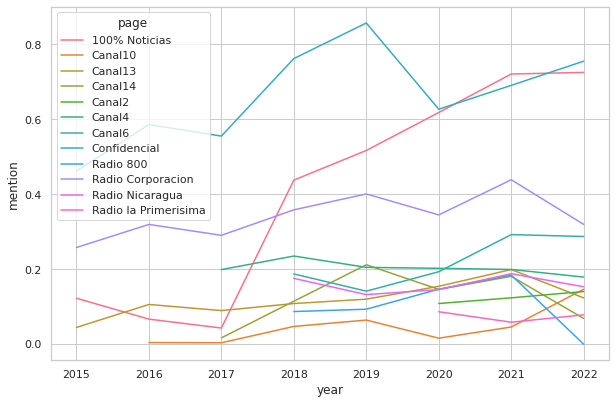

In [23]:
# percentage of Ortega-mentioning articles per year and outlet
# 
data = (df.groupby(["page", "year"])
 .agg({"mention":np.sum})/
 df.groupby(["page", "year"])
 .agg({"mention":np.size})).reset_index()

sns.lineplot(data = data, x="year", y="mention", hue="page")

<AxesSubplot:xlabel='year', ylabel='mention'>

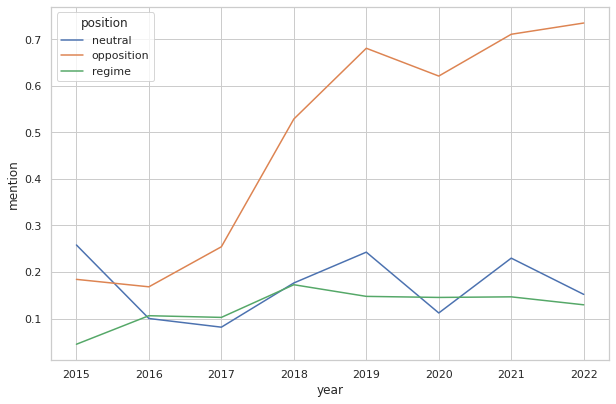

In [24]:
# percentage of Ortega-mentioning articles per year and position
# 
data = (df.groupby(["position", "year"])
 .agg({"mention":np.sum})/
 df.groupby(["position", "year"])
 .agg({"mention":np.size})).reset_index()

sns.lineplot(data = data, x="year", y="mention", hue="position")

In [49]:
# create table to see how many mentions per outlet per year
pd.pivot(dfa.groupby(["page", "year"]).agg({"sentences":np.size}).reset_index(), index = "page", columns = "year", values = "sentences")

year,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
page,,,,,,,,
100% Noticias,374.0,334.0,49.0,3309.0,1533.0,6125.0,9323.0,1171.0
Canal10,NaN,6.0,7.0,78.0,84.0,82.0,307.0,179.0
Canal13,65.0,607.0,659.0,1005.0,887.0,807.0,962.0,80.0
Canal14,NaN,NaN,1.0,244.0,428.0,360.0,385.0,64.0
Canal2,NaN,NaN,NaN,NaN,NaN,119.0,315.0,58.0
Canal4,NaN,NaN,203.0,2422.0,1031.0,337.0,893.0,114.0
Canal6,NaN,NaN,NaN,10.0,286.0,323.0,1000.0,147.0
Confidencial,772.0,2063.0,1644.0,4257.0,4061.0,3752.0,5572.0,900.0
Radio 800,NaN,NaN,NaN,44.0,29.0,27.0,14.0,NaN


In [25]:
# descriptives

dfa.groupby("position")['sentiment'].value_counts(normalize=True)

position    sentiment
neutral     NEU          0.628305
            NEG          0.366511
            POS          0.005184
opposition  NEU          0.575808
            NEG          0.417295
            POS          0.006897
regime      NEU          0.724508
            POS          0.225359
            NEG          0.050133
Name: sentiment, dtype: float64

In [27]:
# create aggregated overview of sentiment per position and year
df_agg = (dfa.groupby(["position", "year"])["sentiment"]
 .value_counts(normalize=True)
 .rename("proportion")
 .reset_index())

In [33]:
# create aggregated overview of sentiment per page and year
df_agg_page = (dfa.groupby(["page", "year"])["sentiment"]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index())

<AxesSubplot:xlabel='year', ylabel='proportion'>

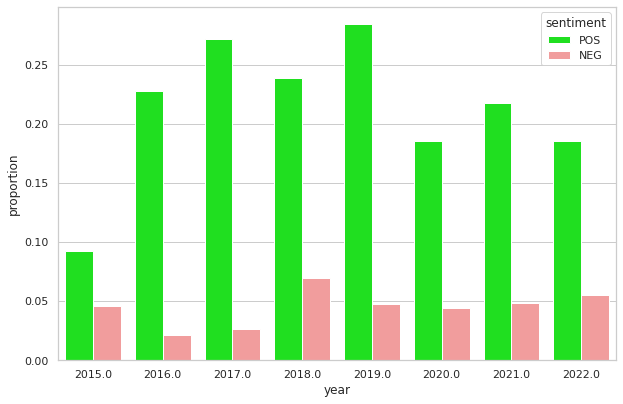

In [28]:
# for regime
(df_agg
 .loc[(df_agg["position"]=="regime") & (df_agg["sentiment"]!="NEU")]
 .pipe((sns.barplot, "data"),
       x="year", y="proportion",
       hue="sentiment", palette = palette))

<AxesSubplot:xlabel='year', ylabel='proportion'>

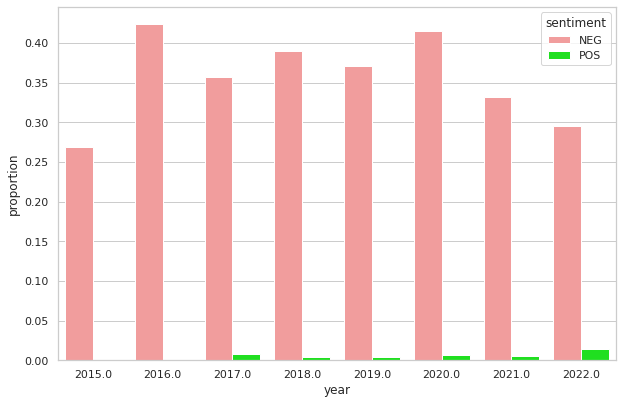

In [30]:
# neutral
(df_agg
 .loc[(df_agg["position"]=="neutral") & (df_agg["sentiment"]!="NEU")]
 .pipe((sns.barplot, "data"),
       x="year", y="proportion",
       hue="sentiment", palette = palette))

<AxesSubplot:xlabel='year', ylabel='proportion'>

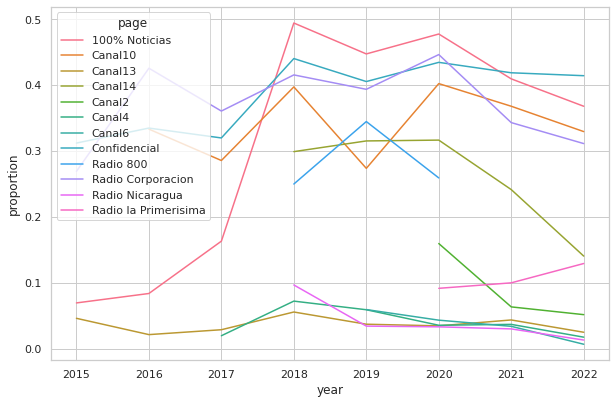

In [34]:
# all positions, but only negative with R corporacion as neutral
(df_agg_page
 .loc[(df_agg_page["sentiment"]=="NEG")]
 .pipe((sns.lineplot, "data"),
       x="year", y="proportion",
       hue="page"))

<AxesSubplot:xlabel='year', ylabel='proportion'>

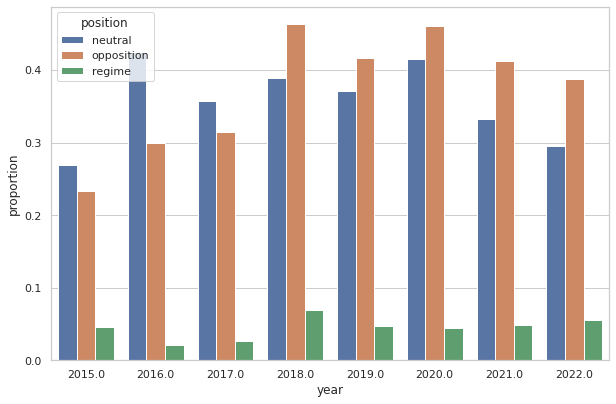

In [35]:
# all positions, but only negative
(df_agg
 .loc[(df_agg["sentiment"]=="NEG")]
 .pipe((sns.barplot, "data"),
       x="year", y="proportion",
       hue="position"))

<AxesSubplot:xlabel='year', ylabel='proportion'>

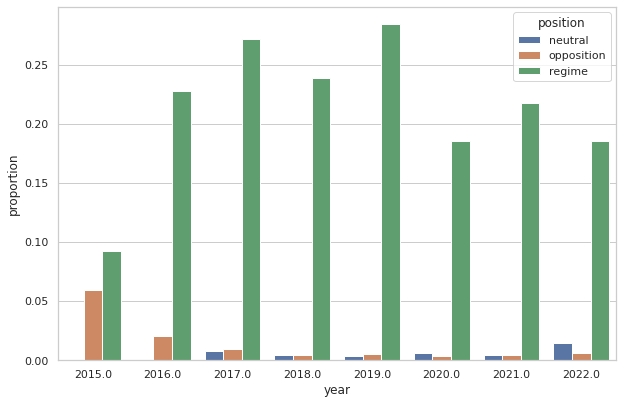

In [41]:
# all positions, but only positive
(df_agg
 .loc[(df_agg["sentiment"]=="POS")]
 .pipe((sns.barplot, "data"),
       x="year", y="proportion",
       hue="position"))

<AxesSubplot:xlabel='year', ylabel='proportion'>

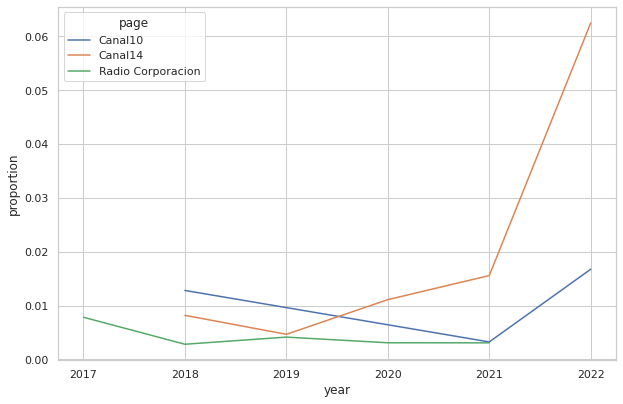

In [47]:
# neutral pages, but only positive
(df_agg_page
 .loc[(df_agg_page["sentiment"]=="POS") & (df_agg_page["page"].isin(["Canal10", "Radio Corporacion", "Canal14"]))]
 .pipe((sns.lineplot, "data"),
       x="year", y="proportion",
       hue="page"))

<AxesSubplot:xlabel='year', ylabel='proportion'>

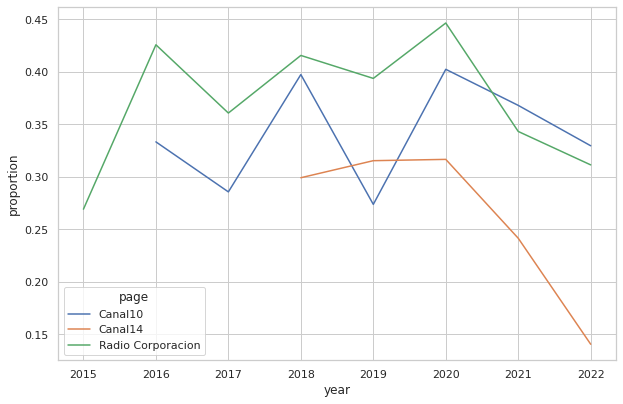

In [48]:
# neutral pages, but only negative
(df_agg_page
 .loc[(df_agg_page["sentiment"]=="NEG") & (df_agg_page["page"].isin(["Canal10", "Radio Corporacion", "Canal14"]))]
 .pipe((sns.lineplot, "data"),
       x="year", y="proportion",
       hue="page"))

In [40]:
dfa.groupby(["position", "year"]).agg({"sentiment":np.size})

sentiment
position   year             
neutral    2015.0         26
           2016.0        417
           2017.0        263
           2018.0       1427
           2019.0       1986
           2020.0       1759
           2021.0       3296
           2022.0        471
opposition 2015.0       1146
           2016.0       2397
           2017.0       1693
           2018.0       7566
           2019.0       5594
           2020.0       9877
           2021.0      14895
           2022.0       2071
regime     2015.0         65
           2016.0        607
           2017.0        862
           2018.0       3747
           2019.0       2612
           2020.0       3801
           2021.0       6172
           2022.0        944